In [16]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
df = pd.read_csv('breast-cancer-wisconsin.csv')

In [18]:
df.head()

,id,clump thickness,uniformity of cell size,uniformity of cell shape,marginal adhesion,single epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [19]:
print(df.describe().T)

                             count          mean            std      min  \
id                           699.0  1.071704e+06  617095.729819  61634.0   
clump thickness              699.0  4.417740e+00       2.815741      1.0   
uniformity of cell size      699.0  3.134478e+00       3.051459      1.0   
uniformity of cell shape     699.0  3.207439e+00       2.971913      1.0   
marginal adhesion            699.0  2.806867e+00       2.855379      1.0   
single epithelial cell size  699.0  3.216023e+00       2.214300      1.0   
bland chromatin              699.0  3.437768e+00       2.438364      1.0   
normal nucleoli              699.0  2.866953e+00       3.053634      1.0   
mitoses                      699.0  1.589413e+00       1.715078      1.0   
class                        699.0  2.689557e+00       0.951273      2.0   

                                  25%        50%        75%         max  
id                           870688.5  1171710.0  1238298.0  13454352.0  
clump thickness

In [20]:
print(df.isnull().sum())
#df = df.dropna()

id                             0
clump thickness                0
uniformity of cell size        0
uniformity of cell shape       0
marginal adhesion              0
single epithelial cell size    0
bare nuclei                    0
bland chromatin                0
normal nucleoli                0
mitoses                        0
class                          0
dtype: int64


In [21]:
df = df.rename(columns={'class':'label'})
print(df.dtypes)

id                              int64
clump thickness                 int64
uniformity of cell size         int64
uniformity of cell shape        int64
marginal adhesion               int64
single epithelial cell size     int64
bare nuclei                    object
bland chromatin                 int64
normal nucleoli                 int64
mitoses                         int64
label                           int64
dtype: object


In [22]:
df['bare nuclei'].replace('?',np.nan,inplace=True)
df['bare nuclei'].fillna(value=0,inplace=True)

df['bare nuclei']=df['bare nuclei'].astype(int)
df['bare nuclei'].replace(0,df['bare nuclei'].mean(),inplace=True )

In [23]:
df = df.rename(columns={'class':'label'})
print(df.dtypes)

id                               int64
clump thickness                  int64
uniformity of cell size          int64
uniformity of cell shape         int64
marginal adhesion                int64
single epithelial cell size      int64
bare nuclei                    float64
bland chromatin                  int64
normal nucleoli                  int64
mitoses                          int64
label                            int64
dtype: object


<Axes: xlabel='label', ylabel='count'>

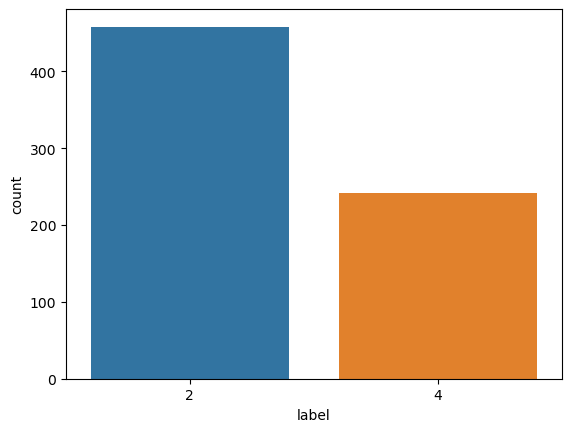

In [24]:
#Understand the data 
sns.countplot(x="label", data=df) #M - malignant   B - benign

In [25]:
####### Replace categorical values with numbers########
print("Distribution of data: ", df['label'].value_counts())

#Define the dependent variable that needs to be predicted (labels)
y = df["label"].values
print("Labels before encoding are: ", np.unique(y))

# Encoding categorical data from text (B and M) to integers (0 and 1)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M=1 and B=0
print("Labels after encoding are: ", np.unique(Y))

Distribution of data:  2    458
4    241
Name: label, dtype: int64
Labels before encoding are:  [2 4]
Labels after encoding are:  [0 1]


In [26]:
#Define x and normalize / scale values

#Define the independent variables. Drop label and ID, and normalize other data
X = df.drop(labels = ["label", "id"], axis=1) 
print(X.describe().T) #Needs scaling

                             count      mean       std  min  25%  50%  75%  \
clump thickness              699.0  4.417740  2.815741  1.0  2.0  4.0  6.0   
uniformity of cell size      699.0  3.134478  3.051459  1.0  1.0  1.0  5.0   
uniformity of cell shape     699.0  3.207439  2.971913  1.0  1.0  1.0  5.0   
marginal adhesion            699.0  2.806867  2.855379  1.0  1.0  1.0  4.0   
single epithelial cell size  699.0  3.216023  2.214300  1.0  2.0  2.0  4.0   
bare nuclei                  699.0  3.542799  3.601872  1.0  1.0  1.0  5.0   
bland chromatin              699.0  3.437768  2.438364  1.0  2.0  3.0  5.0   
normal nucleoli              699.0  2.866953  3.053634  1.0  1.0  1.0  4.0   
mitoses                      699.0  1.589413  1.715078  1.0  1.0  1.0  1.0   

                              max  
clump thickness              10.0  
uniformity of cell size      10.0  
uniformity of cell shape     10.0  
marginal adhesion            10.0  
single epithelial cell size  10.0  
bar

In [27]:
#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Shape of training data is: ", X_train.shape)
print("Shape of testing data is: ", X_test.shape)

Shape of training data is:  (524, 9)
Shape of testing data is:  (175, 9)


In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

ModuleNotFoundError: No module named 'tensorflow.compat'

In [31]:
model = Sequential()
model.add(Dense(16, input_dim=9, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                160       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
#Fit with no early stopping or other callbacks
history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/100
9/9 [==============================] - 3s 74ms/step - loss: 1.9223 - accuracy: 0.5592 - val_loss: 1.3663 - val_accuracy: 0.5486
Epoch 2/100
9/9 [==============================] - 0s 16ms/step - loss: 1.7826 - accuracy: 0.4752 - val_loss: 1.1221 - val_accuracy: 0.4857
Epoch 3/100
9/9 [==============================] - 0s 16ms/step - loss: 1.5394 - accuracy: 0.4389 - val_loss: 0.9730 - val_accuracy: 0.4686
Epoch 4/100
9/9 [==============================] - 0s 15ms/step - loss: 1.4671 - accuracy: 0.4332 - val_loss: 0.8799 - val_accuracy: 0.4457
Epoch 5/100
9/9 [==============================] - 0s 14ms/step - loss: 1.4808 - accuracy: 0.4122 - val_loss: 0.8252 - val_accuracy: 0.4629
Epoch 6/100
9/9 [==============================] - 0s 15ms/step - loss: 1.2771 - accuracy: 0.4389 - val_loss: 0.7903 - val_accuracy: 0.4743
Epoch 7/100
9/9 [==============================] - 0s 15ms/step - loss: 1.2601 - accuracy: 0.4656 - val_loss: 0.7583 - val_accuracy: 0.4914
Epoch 8/100
9/9 [===

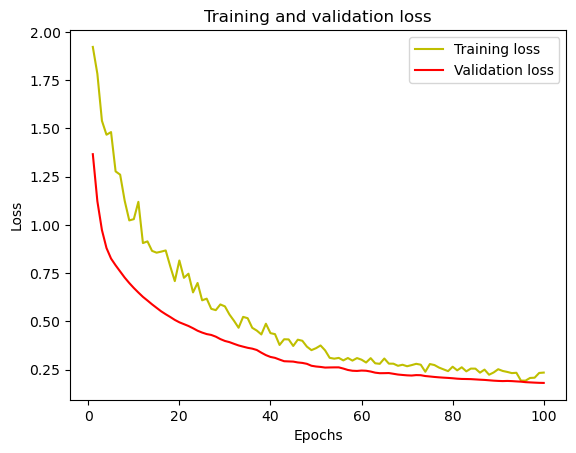

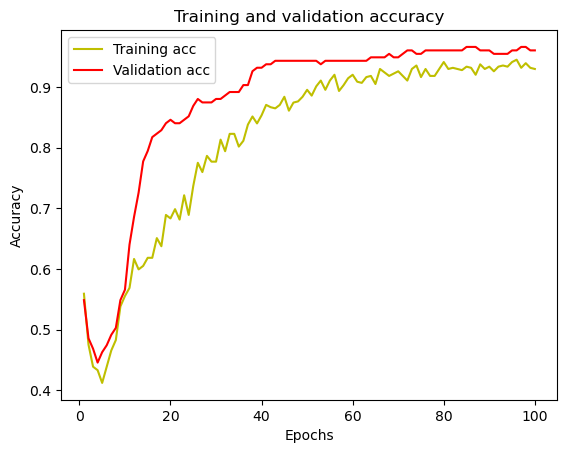

In [33]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

6/6 [==============================] - 0s 2ms/step


<Axes: >

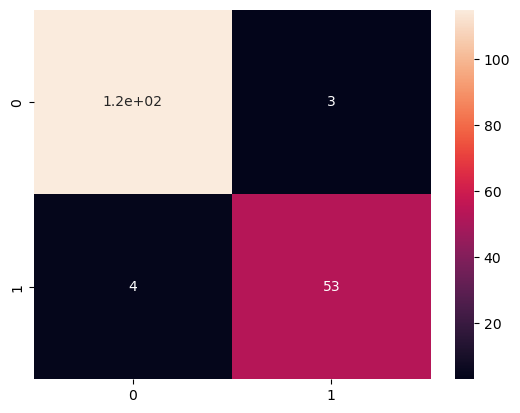

In [34]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)